In [1]:
%load_ext autoreload
%autoreload 2
import pyfits
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import glob
import os
from matplotlib.path import Path
from scipy import optimize as op
%matplotlib inline

## R band data

(150, 400)

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


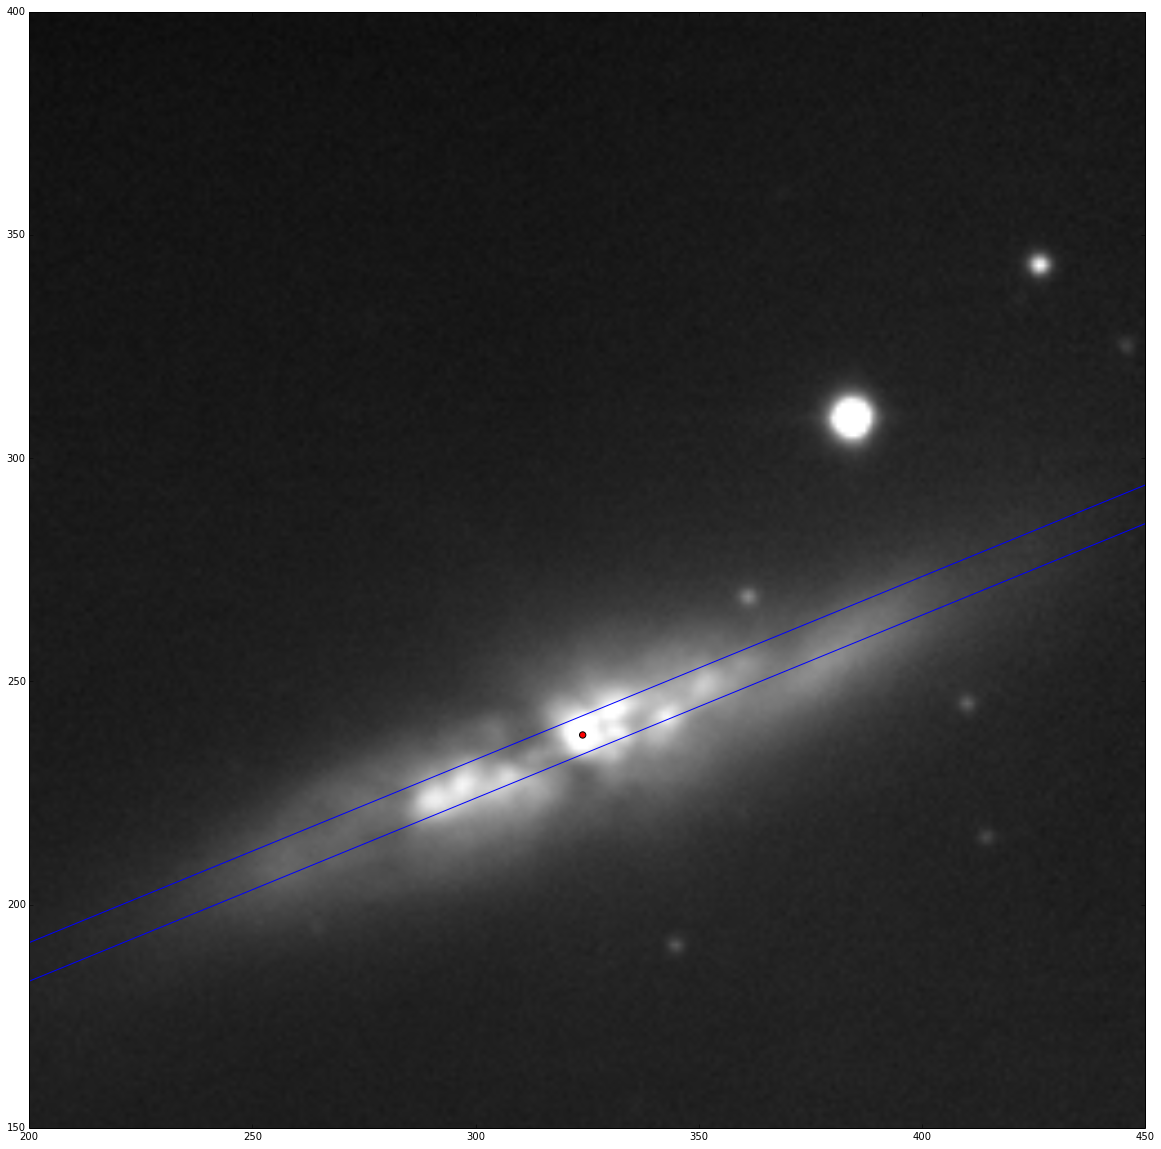

In [5]:
data = pyfits.open('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/coadd/coadd.fits')[0].data
plt.figure(figsize=(20,20))
plt.imshow(data, origin="lowerleft",norm=LogNorm(), cmap="gray")
plt.clim(800,2500)

cx,cy = (324,238)
plt.scatter(cx,cy,s=40,c='r')
s=0.41
x = cx + np.linspace(-150,150,300)
slitsize = 8

y1 = cy - slitsize*np.sqrt(1+s**2)/2. + s*np.linspace(-150,150,300)
y2 = cy + slitsize*np.sqrt(1+s**2)/2. + s*np.linspace(-150,150,300)
plt.plot(x,y1,'b')
plt.plot(x,y2,'b')
plt.xlim([200,450])
plt.ylim([150,400])

# Create a slit in the middle, and calculate the flux within each radius bin

create a slit
https://stackoverflow.com/questions/3654289/scipy-create-2d-polygon-mask

In [3]:
def create_mask(verts,nx=512, ny=512):
    x, y = np.meshgrid(np.arange(nx), np.arange(ny))
    x, y = x.flatten(), y.flatten()
    points = np.vstack((x,y)).T
    path = Path(verts)
    grid = path.contains_points(points)
    grid = grid.reshape((ny,nx))
    return grid

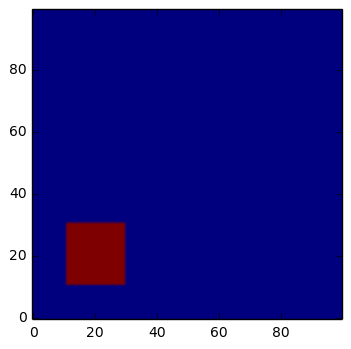

In [4]:
test=create_mask([(10,10),(10,30),(30,30),(30,10)],100,100)
plt.imshow(test,origin='lowerleft')

In [5]:
def find_verts(slit, r):
    center = (324,238)
    slope = 0.41
    cx,cy = center
    v1 = (r*1/np.sqrt(1+s**2) - slit*s/np.sqrt(1+s**2)+cx, r*s/np.sqrt(1+s**2) + slit*1/np.sqrt(1+s**2)+cy)
    v2 = (r*1/np.sqrt(1+s**2) + slit*s/np.sqrt(1+s**2)+cx, r*s/np.sqrt(1+s**2) - slit*1/np.sqrt(1+s**2)+cy)
    v3 = (-r*1/np.sqrt(1+s**2) + slit*s/np.sqrt(1+s**2)+cx, -r*s/np.sqrt(1+s**2) - slit*1/np.sqrt(1+s**2)+cy)
    v4 = (-r*1/np.sqrt(1+s**2) - slit*s/np.sqrt(1+s**2)+cx, -r*s/np.sqrt(1+s**2) + slit*1/np.sqrt(1+s**2)+cy)
    return [v1,v2,v3,v4]

In [6]:
find_verts(6,5)

[(326.35013983922931, 245.44827783692762),
 (330.90237921285467, 234.34525497442681),
 (321.64986016077069, 230.55172216307238),
 (317.09762078714533, 241.65474502557319)]

285197.0

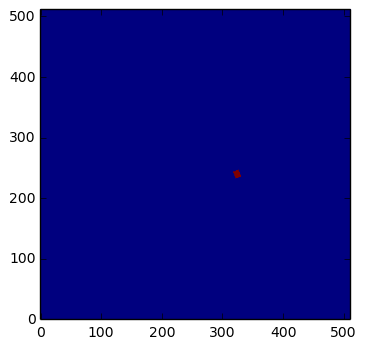

In [7]:
mask = create_mask(find_verts(6,5 ))
plt.imshow(mask,origin='lowerleft')
np.sum(data[mask])

(150, 400)

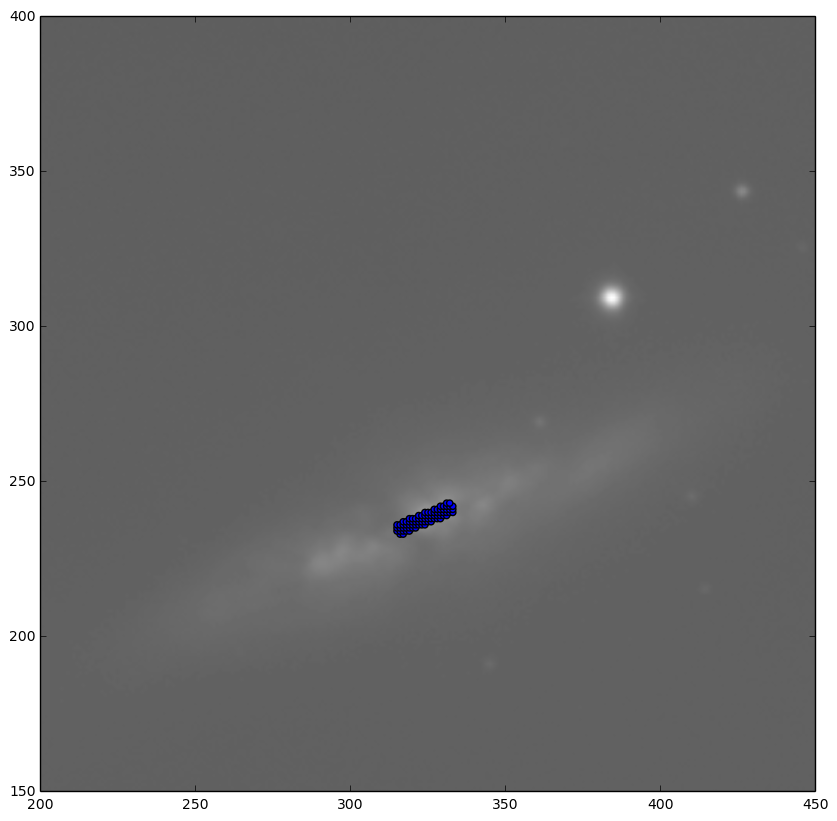

In [8]:
mask = create_mask(find_verts(2,10 ))
plt.figure(figsize=(10,10))
plt.imshow(data, origin="lowerleft",norm=LogNorm(), cmap="gray")
plt.scatter(np.where(mask)[1],np.where(mask)[0])
plt.xlim([200,450])
plt.ylim([150,400])

## Chto's clever idea

In [2]:
from scipy.ndimage.interpolation import rotate, shift

In [6]:
data = pyfits.open('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/R/coadd/coadd.fits')[0].data
dataRotated = rotate(data,22.2, order=5)
#dataRotated = rotate(data,0, order=5)
cutData=dataRotated[250:350, 250:550]

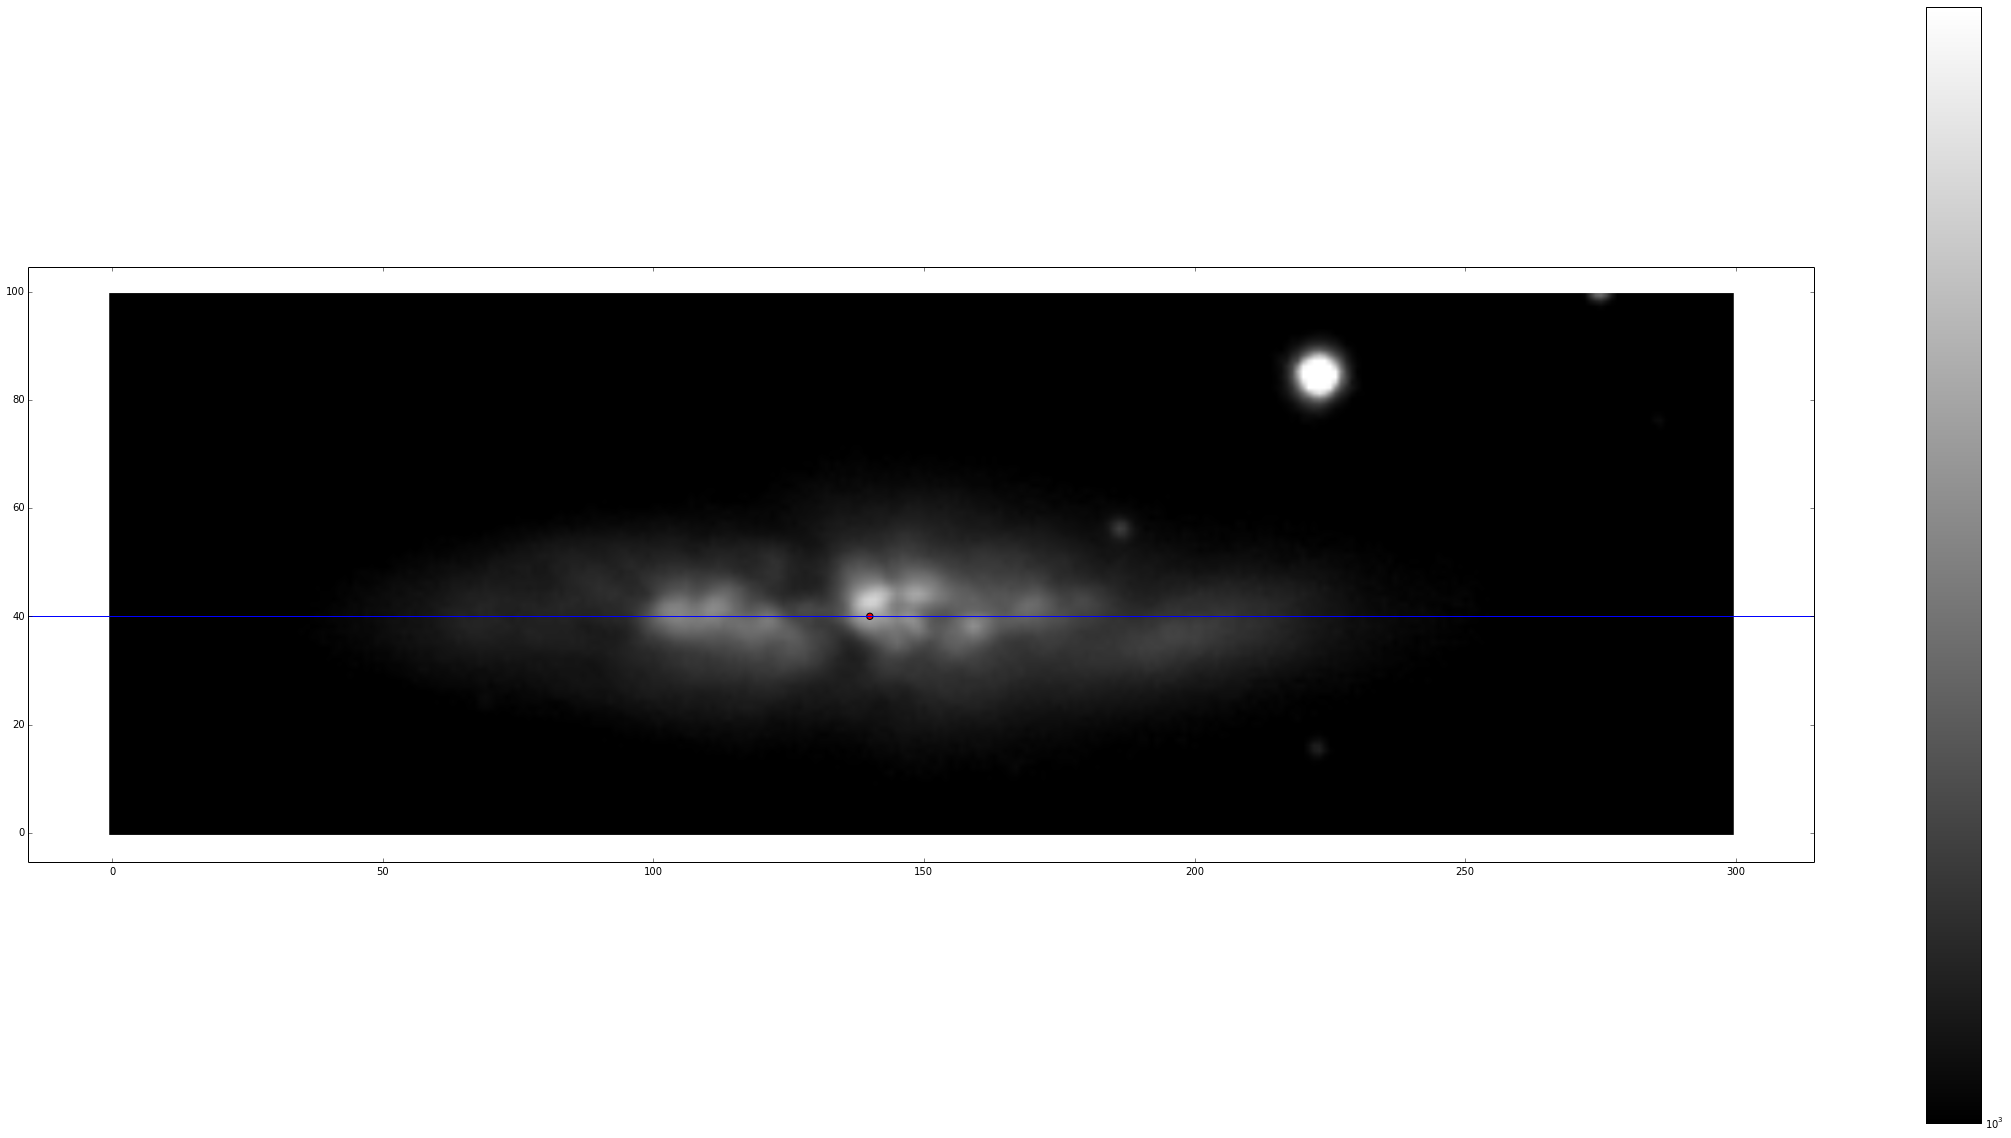

In [7]:
fig=plt.figure(figsize=(40,20))
plt.imshow(cutData,origin="lowerleft",norm=LogNorm(), cmap="gray",vmin=1000,vmax=5000)
plt.colorbar()
cx,cy = (140,40)
plt.scatter(cx,cy,s=40,c='r')
plt.axhline(40)

In [8]:
predir  = '/afs/ir.stanford.edu/class/physics100/workdir/g2/final/spectra/'
datdir  = predir+'spec_0601/'
slitdir = datdir+'g2_Final_060117/'
slit_M82_data = pyfits.open(slitdir+'Focus_M82_1h_bef.fit')[0].data
slit_M82_hdr  = pyfits.open(slitdir+'Focus_M82_1h_bef.fit')[0].header

(200, 400)

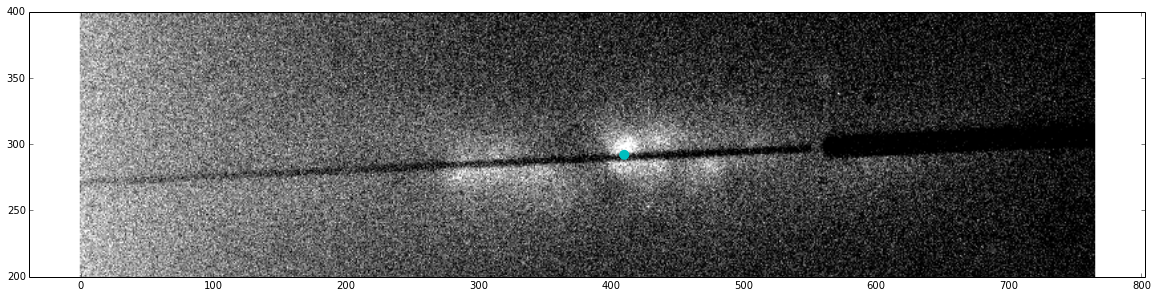

In [9]:
ulx_x,ulx_y = 410,292
plt.figure(figsize=(20,22))
plt.imshow(slit_M82_data,origin='lower',cmap='gray'); plt.clim(1220,1300)
plt.scatter(ulx_x,ulx_y,c='c',s=100,lw=0)
plt.ylim(200,400)

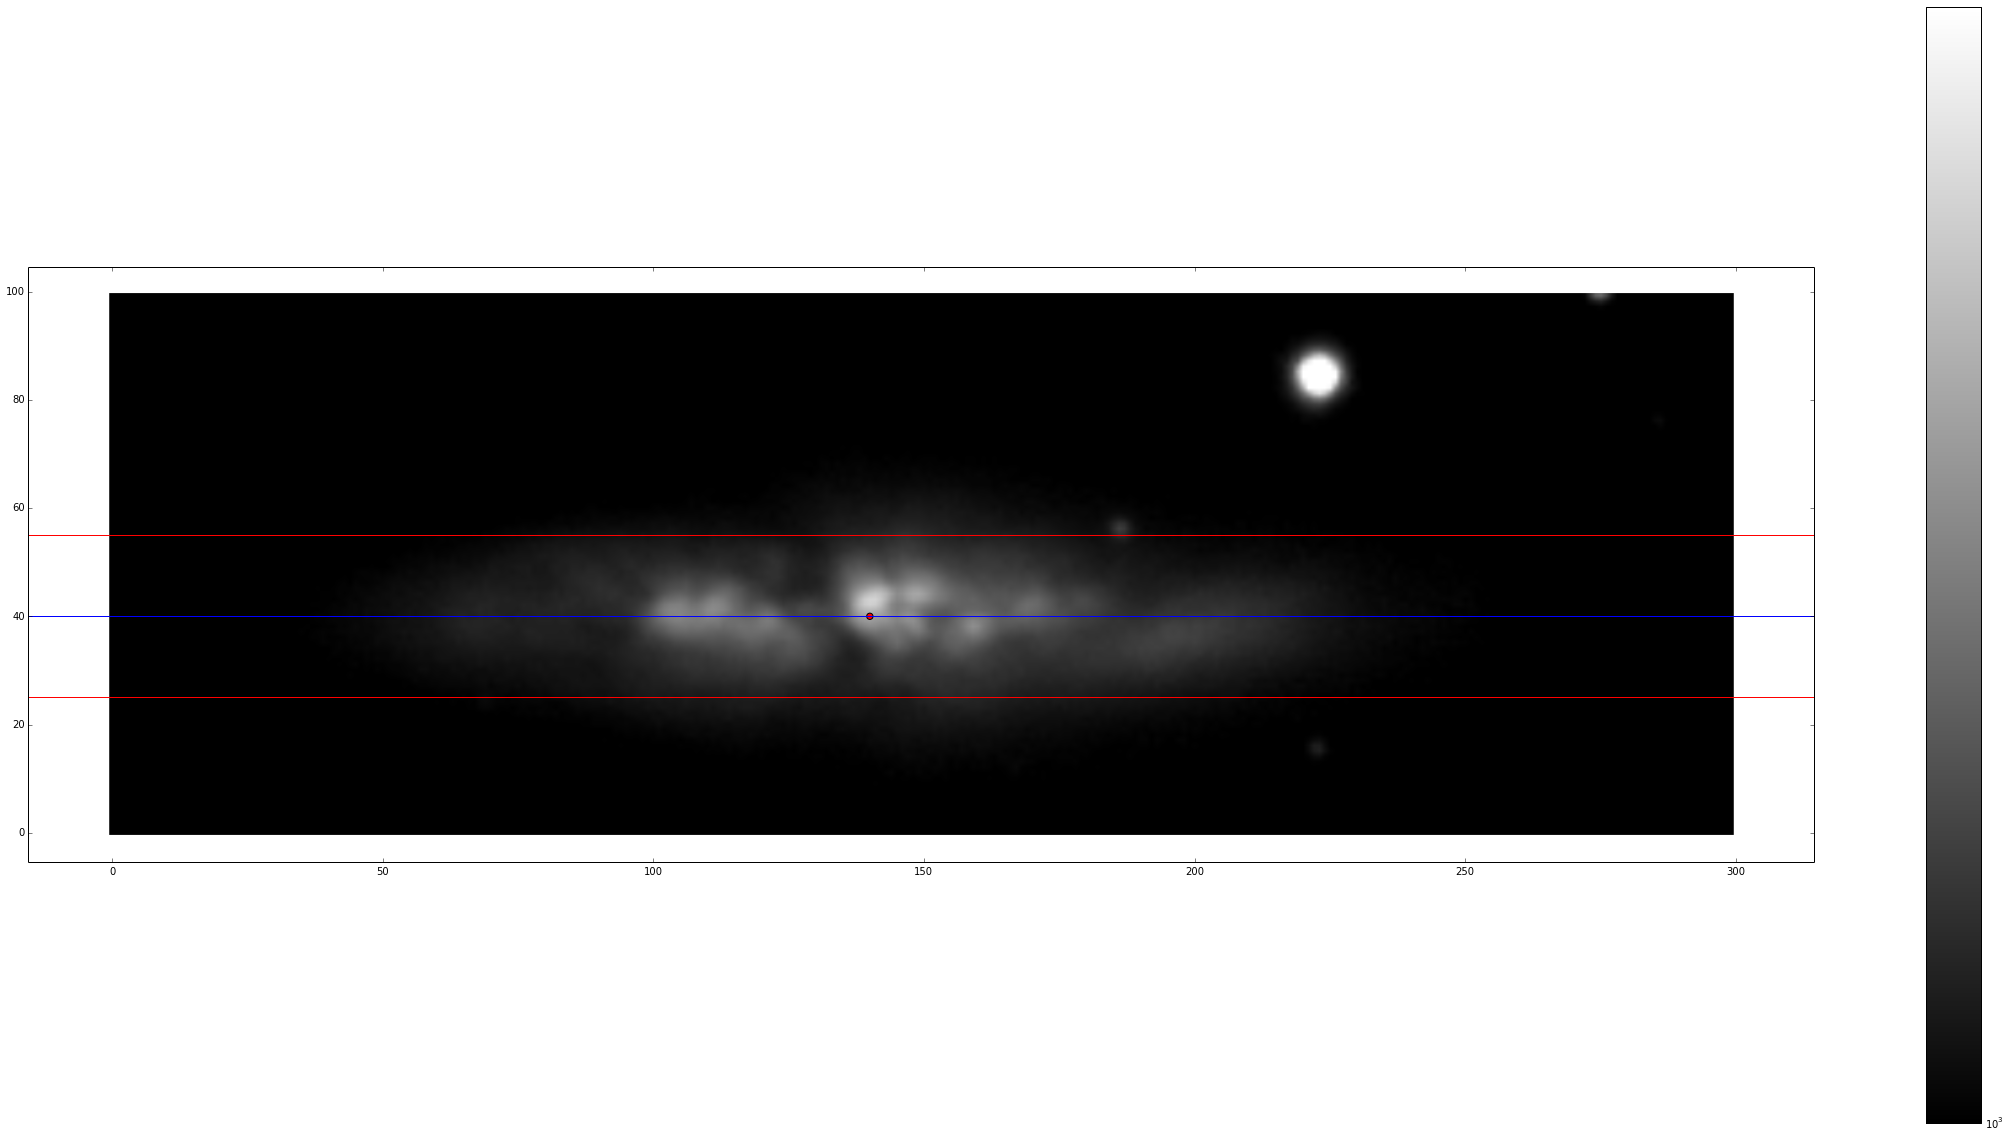

In [10]:
fig=plt.figure(figsize=(40,20))
plt.imshow(cutData,origin="lowerleft",norm=LogNorm(), cmap="gray",vmin=1000,vmax=5000)
plt.colorbar()
cx,cy = (140,40)
plt.scatter(cx,cy,s=40,c='r')
cent=40
dist=15
plt.axhline(cent,c="b")
plt.axhline(cent-dist, c="r")
plt.axhline(cent+dist, c="r")

In [11]:
upper=cent+dist
lower=cent-dist
radius=(np.arange(21)-10)*4

In [12]:
croppedData=cutData[lower:upper,:]
cx,cy = np.array([140,40])-np.array([0,lower])

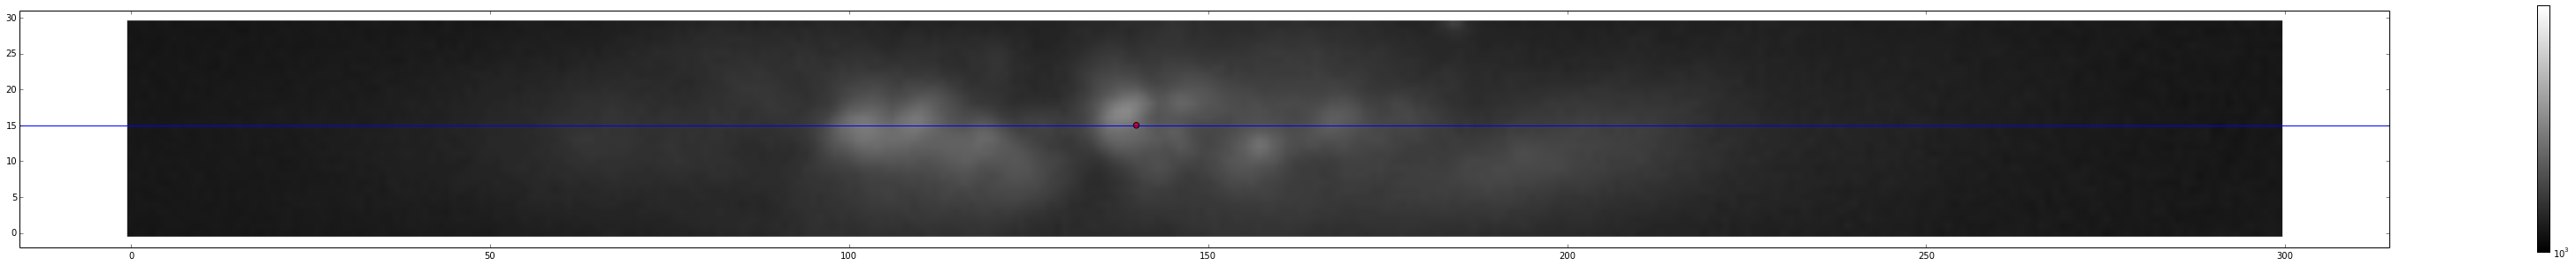

In [40]:
fig=plt.figure(figsize=(60,5))
plt.imshow(croppedData,origin="lowerleft",norm=LogNorm(), cmap="gray",vmin=1000,vmax=5000)

plt.colorbar()
plt.scatter(cx,cy,s=40,c='r')
cent=cy
dist=20
plt.axhline(cent,c="b")
#plt.axhline(cent-dist, c="r")
#plt.axhline(cent+dist, c="r")

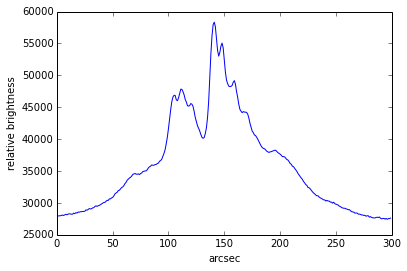

In [14]:
projected=np.sum(croppedData,axis=0)
plt.plot(projected)
plt.xlabel("arcsec")
plt.ylabel("relative brightness")

invalid value encountered in divide


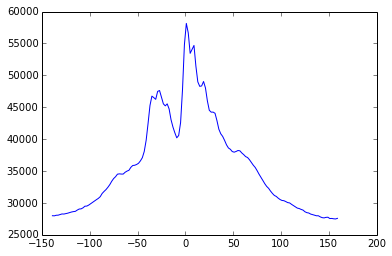

In [41]:
radiusArray=np.arange(len(projected))-cx
bins=(np.arange(301)-150)*2
radiuscent=(bins[1:]+bins[:-1])/2.
Sum_R, edge = np.histogram(radiusArray, weights=projected,bins=bins)
Counts_R, edge = np.histogram(radiusArray,bins=bins)
MeanProjected_R=Sum_R/Counts_R
plt.plot(radiuscent, MeanProjected_R)

# G band data

In [42]:
data = pyfits.open('/afs/.ir/users/i/a/iameric/physics100/workdir/g2/final/image/G/coadd/coadd.fits')[0].data

In [43]:
dataRotated = rotate(data,22.2, order=5)
#dataRotated = rotate(data,0, order=5)
cutData=dataRotated[250:350, 250:550]

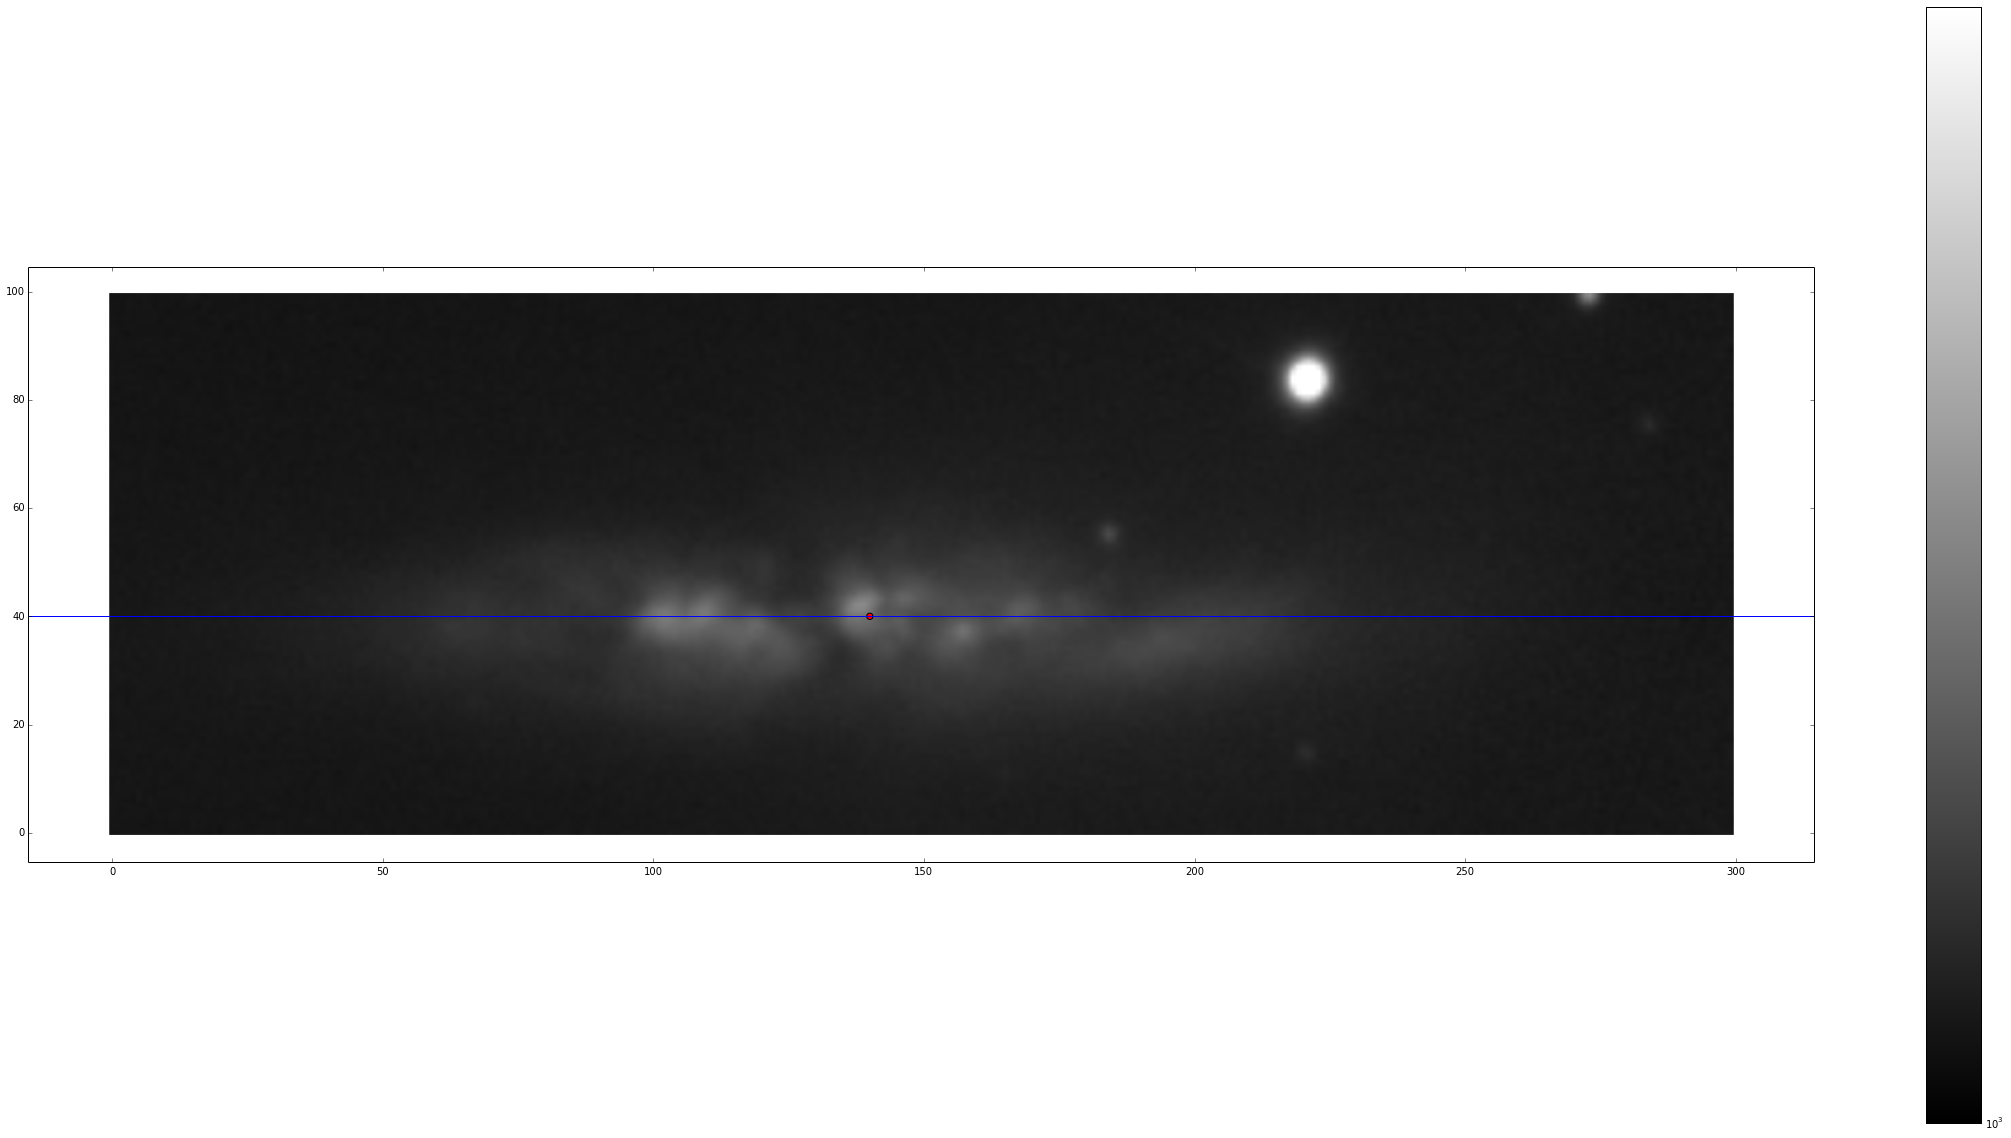

In [44]:
fig=plt.figure(figsize=(40,20))
plt.imshow(cutData,origin="lowerleft",norm=LogNorm(), cmap="gray",vmin=1000,vmax=5000)
plt.colorbar()
cx,cy = (140,40)
plt.scatter(cx,cy,s=40,c='r')
plt.axhline(40)

In [45]:
croppedData=cutData[lower:upper,:]
cx,cy = np.array([140,40])-np.array([0,lower])

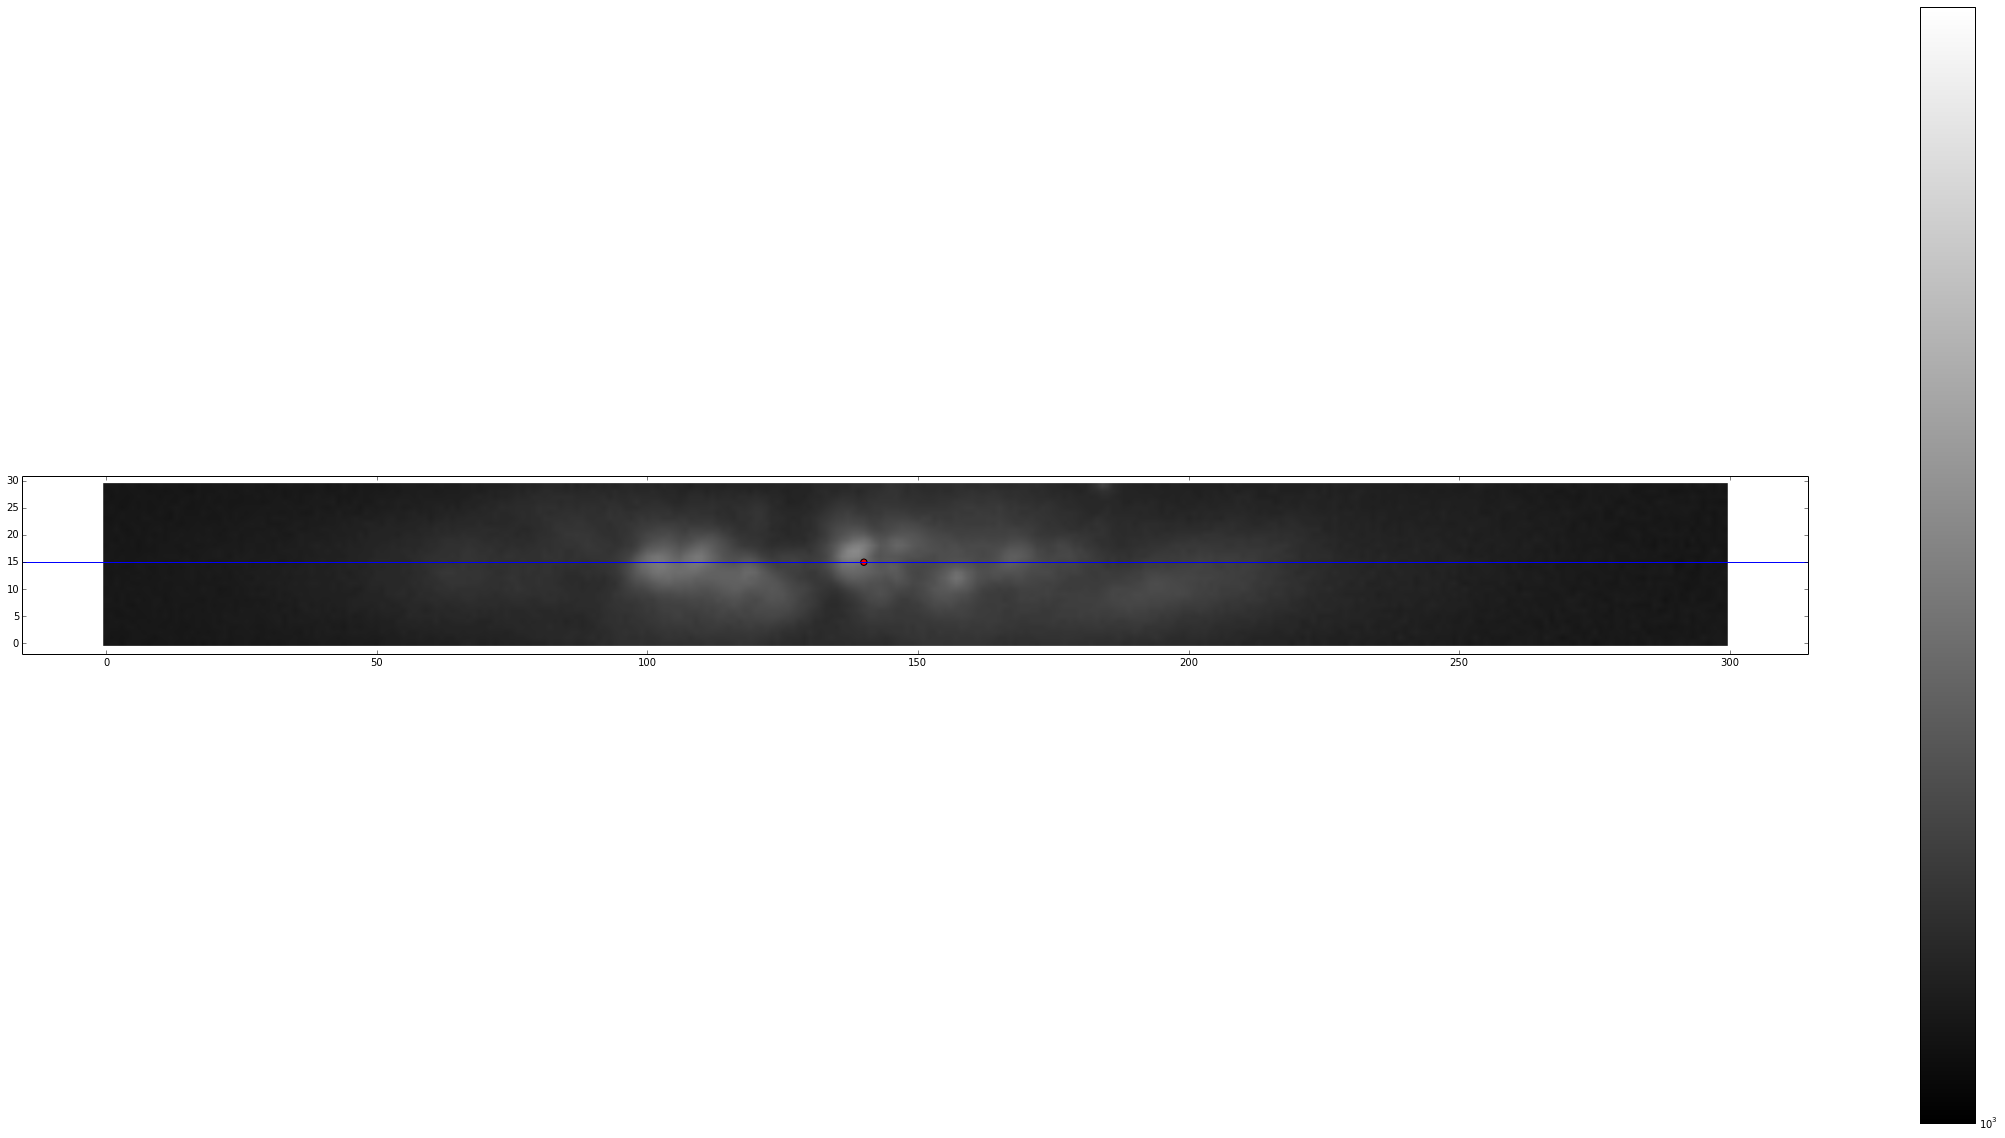

In [46]:
fig=plt.figure(figsize=(40,20))
plt.imshow(croppedData,origin="lowerleft",norm=LogNorm(), cmap="gray",vmin=1000,vmax=5000)

plt.colorbar()
plt.scatter(cx,cy,s=40,c='r')
cent=cy
dist=20
plt.axhline(cent,c="b")

In [47]:
projected_G=np.sum(croppedData,axis=0)


invalid value encountered in divide


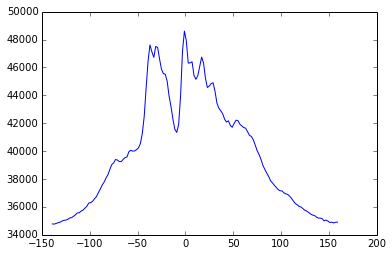

In [48]:
radiusArray=np.arange(len(projected_G))-cx
bins=(np.arange(301)-150)*2
radiuscent=(bins[1:]+bins[:-1])/2.
Sum_G, edge = np.histogram(radiusArray, weights=projected_G,bins=bins)
Counts_G, edge = np.histogram(radiusArray,bins=bins)
MeanProjected_G=Sum_G/Counts_G
plt.plot(radiuscent, MeanProjected_G)

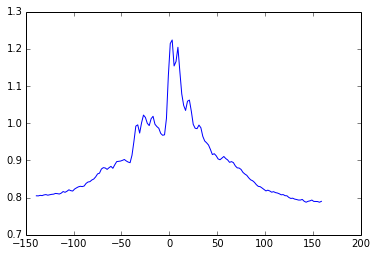

In [51]:
plt.plot(radiuscent, MeanProjected_R/MeanProjected_G)

I think we can ignore the effect of extinction in the region where r is greater than 60. 

In [24]:
mask=np.where(np.abs(radiuscent)>60)
radiusMasked=radiuscent[mask]
MeanProjected_R_masked=MeanProjected_R[mask]

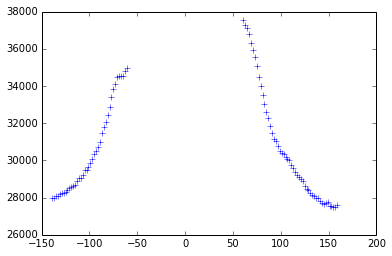

In [25]:
plt.plot(radiusMasked, MeanProjected_R_masked, "+")

In [26]:
right=MeanProjected_R_masked[np.where(radiusMasked>0)]
rightRadius=radiusMasked[np.where(radiusMasked>0)]
maskright=np.logical_not(np.isnan(right))
right=right[maskright]
rightRadius=rightRadius[maskright]
left= MeanProjected_R_masked[np.where(radiusMasked<0)]
leftRadius=-radiusMasked[np.where(radiusMasked<0)]
maskleft=np.logical_not(np.isnan(left))
left=left[maskleft]
leftRadius=leftRadius[maskleft]
rightNorm=right-np.min(right)
leftNorm=left-np.min(left)

In [27]:
def fitFunction(Rarray, hr,A):
    rmax=1000
    y=[]
    for R in Rarray:
        r=np.arange(R+0.2,rmax,0.01)
        y.append(A*np.trapz(np.exp(-r/hr)*r/np.sqrt(r**2-R**2), r))
    y=np.array(y)
    return y

In [28]:
 popt, pcov = op.curve_fit(fitFunction, rightRadius,rightNorm, p0=(30,1500))

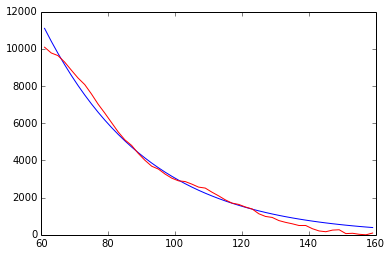

In [29]:
plt.plot(rightRadius, fitFunction(rightRadius, *popt))
plt.plot(rightRadius,rightNorm,c="r")

In [30]:
print "Ro: {0}, A: {1}".format(popt[0], popt[1])

Ro: 26.1905816236, A: 2174.43623997


In [31]:
x = np.arange(-300, 300.3, 0.3)
y = np.arange(-300, 300.3, 0.3)
print x

[-300.  -299.7 -299.4 ...,  299.4  299.7  300. ]


In [32]:
xv, yv = np.meshgrid(x, y)

<matplotlib.colorbar.Colorbar instance at 0x7f81f1f548c0>

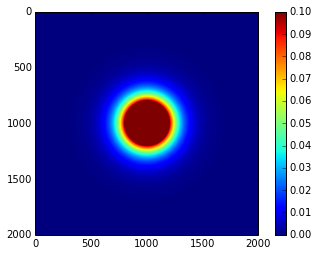

In [33]:
M=np.exp(-np.sqrt((xv**2+yv**2))/popt[0])
plt.imshow(M, vmax=0.1,vmin=0.0)
plt.colorbar()

In [34]:
def U(x):
    cent=np.array([x,0])
    distArray=np.sqrt(((xv-x)**2+yv**2))
    mask=np.where(distArray>1.)
    Utotal=-np.nansum(M[mask]/distArray[mask])
    return Utotal

In [35]:
x=np.arange(1,100,1)
Utotal=[]
for item in x:
    Utotal.append(U(item))

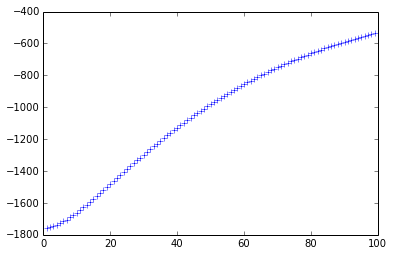

In [36]:
plt.plot(x,Utotal,"+")

In [194]:
from scipy.interpolate import UnivariateSpline

In [195]:
spl = UnivariateSpline(x, Utotal, k=4, s=10)

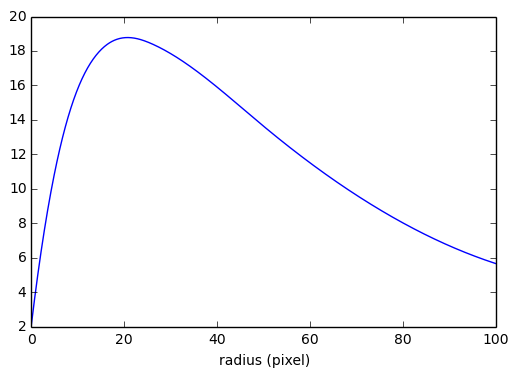

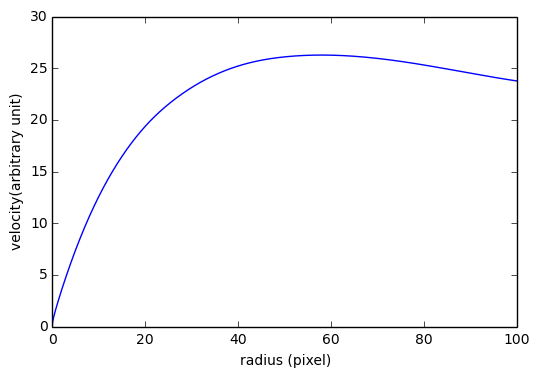

In [205]:
radius = np.linspace(0,100,1000)
derivative =spl.derivative()(radius)
velocity=np.sqrt(radius*derivative)
fig=plt.figure()
plt.plot(radius, derivative)
plt.xlabel("radius (pixel)")
fig=plt.figure()
plt.plot(radius, velocity)
plt.xlabel("radius (pixel)")
plt.ylabel("velocity(arbitrary unit)")

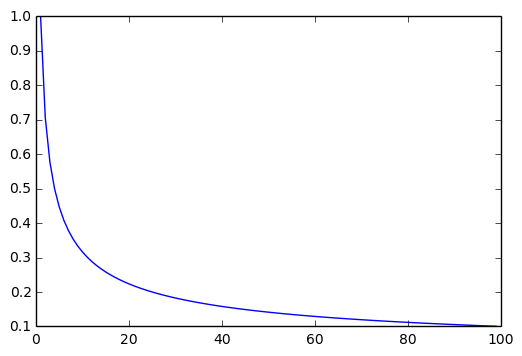

In [203]:
y=1/np.sqrt(x)
plt.plot(x,y)